# Stacked Plots

One common plotting technique has not been discussed thus far and that’s stacking. Stacked bar charts and histograms are not uncommon, but there are often better plot choices available.

The most basic stacked chart takes a single bar representing the full count, and divides it into colored segments based on frequencies on a categorical variable. If this sounds familiar, that's because it almost perfectly coincides with the description of a pie chart, except that the shape being divided is different.

In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df=pd.read_csv('../Code/fuel-econ.csv')
df.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


(0, 2)

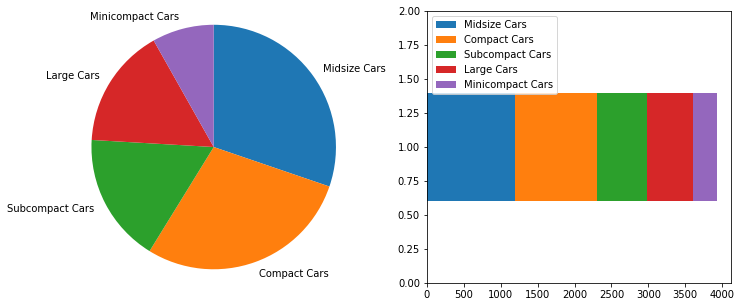

In [6]:
# pre processing: count and sort by the number of instances of each category
sorted_counts = df.VClass.value_counts()

#establish the figure
plt.figure(figsize = [12,5])

#left plt: pie chart
plt.subplot(1, 2, 1)
plt.pie(sorted_counts, labels=sorted_counts.index, startangle = 90,
       counterclock = False);
plt.axis('square')

#right plot: horizontally stacked bar
plt.subplot(1, 2, 2)
base_line = 0
for i in range(sorted_counts.shape[0]):
    plt.barh(y = 1, width = sorted_counts[i], left = base_line)
    base_line +=sorted_counts[i] 

plt.legend(sorted_counts.index)
plt.ylim([0,2])

The stacked bar is built through successive calls of the matplotlib **barh** function;

each time the function is called, the bar that is plotted is assigned a new color. The choice of **"y"** is arbitrary: it'll just center the bar around y = 1, but it doesn't have any inherent meaning. 

The **"left"** parameter specifies the left edge of each bar added to the stack, which starts at the **baseline** of 0 and is built up with each stacked bar. Note in this case that the bar is being plotted with absolute counts, rather than proportions. A discussion of absolute vs. relative frequencies will come later down the page!

##### Given this similarity, cautions regarding use of the stacked bar are fairly similar to that of the pie chart:

* Make sure that relative frequencies are a meaningful comparison.
* Try to limit yourself to a small number of categories, up to about five

* Make sure that categories are arranged in a sensible order, e.g. by frequency for nominal data or by levels for ordinal data.


Otherwise, the standard bar chart is a reliable option that should be used in most cases. Only use the pie chart or singly divided bar if there's a compelling reason to do so.


The debate becomes more interesting when multiple features get involved. When should we feel free to create a stacked bar chart versus using a clustered bar chart? There are **two major categories of stacked bar chart** that I want to focus on here: **plotting by absolute frequency** and **plotting by relative frequency**. We'll start with code for an absolute frequency stacked chart below.

In [52]:
df['trans_type'] = df.trans.apply(lambda x: x.split()[0])

cat1_order = df.VClass.value_counts().index
cat2_order = df.trans_type.value_counts().index

In [53]:
cat1_order

Index(['Midsize Cars', 'Compact Cars', 'Subcompact Cars', 'Large Cars',
       'Minicompact Cars'],
      dtype='object')

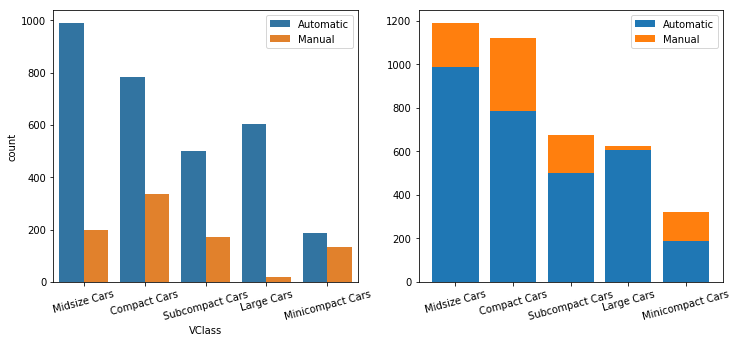

In [54]:
plt.figure(figsize = [12,5])

#left plot: clustered bar chart, absolute counts
plt.subplot(1, 2, 1)
sb.countplot(data =df, x='VClass', hue='trans_type', order=cat1_order, hue_order = cat2_order)
plt.xticks(rotation = 15)
plt.legend()

plt.subplot(1, 2, 2)
base_line = np.zeros(len(cat1_order))
#for each second variable category
for i in range(len(cat2_order)):
    cat2 = cat2_order[i]
    inner_counts = df[df.trans_type==cat2]['VClass'].value_counts()
    #then plot those counts of the first category
    plt.bar(x = np.arange(len(cat1_order)), height = inner_counts[cat1_order],
           bottom = base_line)
    base_line += inner_counts[cat1_order]

plt.xticks(np.arange(len(cat1_order)),cat1_order)
plt.xticks(rotation = 15)
plt.legend(cat2_order)
    


The strategy for this plot is very similar to the single stacked bar shown above, except that we're using the standard bar with "x" and "bottom" parameters, and that baselines is a list of base heights. We want to create all of the bars for a particular secondary category at the same time so that creation of the legend has a 1:1 mapping to bar calls. You might notice below that the order of labels in the legend is the reverse of the order in which the bars are stacked. You'll see code to handle this in the relative frequency plot below!

The stacked bar chart plotted by **absolute frequency** carries one **big advantage over the clustered bar chart**: for the variable plotted on the x-axis, **it's clear which category level has the highest frequency**, in this case "Midsize Cars". 



The **disadvantage of the stacked bar chart** comes **with interpretation of the second, stacked variable**. If you want to compare the relative counts of this second variable across levels of the first, you can really only do that for the category plotted on the baseline, which in this case is the blue one, "Automatic". For the remaining categories, it's much harder to make the comparison of values – you can't really tell that the counts of "Manual" are larger in the "Compact Cars" than the "Larg Cars" from the stacked chart, where it's directly comparable in the clustered bar chart.

Now, let's take a look at what happens when we create the stacked bar chart with **relative frequencies** instead, where each bar is scaled to a total height of 1.

In [55]:
df['trans_type'] = df.trans.apply(lambda x: x.split()[0])

cat1_order = df.VClass.value_counts().index
cat2_order = df.trans_type.value_counts().index

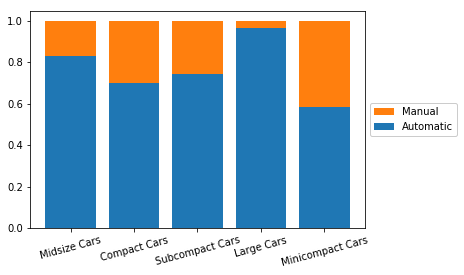

In [56]:
artists = [] # for storing references to plot elements
baselines = np.zeros(len(cat1_order))
cat1_counts = df.VClass.value_counts()

# for each second-variable category:
for i in range(len(cat2_order)):
    # isolate the counts of the first category,
    cat2 = cat2_order[i]
    inner_counts = df[df.trans_type== cat2]['VClass'].value_counts()
    inner_props = inner_counts / cat1_counts
    # then plot those counts on top of the accumulated baseline
    bars = plt.bar(x = np.arange(len(cat1_order)),
                   height = inner_props[cat1_order],
                   bottom = baselines)
    artists.append(bars)
    baselines += inner_props[cat1_order]

plt.xticks(np.arange(len(cat1_order)), cat1_order)
plt.xticks(rotation = 15)
plt.legend(reversed(artists), reversed(cat2_order), framealpha = 1,
           bbox_to_anchor = (1, 0.5), loc = 6);

There are two main changes to this code compared to the previous plot. 

* First of all, the **cat1_counts** variable has been computed to change the absolute frequencies into relative frequencies within each x-axis category. 

* Secondly, some code has been added to reverse the order of bars in the legend. The artists variable has been added to store references to each of the bar groups added from each bar call. Then in the legend function call, we make use of the built-in Python function reversed to reverse the order in which the artists and labels are included in the legend. The additional parameters affect the positioning of the legend: setting an **anchor** for the legend box on the right side of the plot via **"bbox_to_anchor"**, and positioning the anchor to the legend's left with "loc = 6".

Since the bars are all the same height of 1 with a relative frequency stacked bar chart, we lose the ability to compare the absolute counts on the categorical variable plotted on the x-axis (i.e. we can't tell that "Compact Cars" has the most counts and "Large Cars" the least amount). In exchange, we can now compare the relative prevalence of the stacked variable on both the first category on the bottom ("Automatic") as well as the category on the top ("Manual").